In [12]:
all_data = {}  # Khởi tạo dưới dạng dictionary

for file_path in file_paths:
    if os.path.exists(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            print(f"Số lượng bản ghi trong {file_path}: {len(data)}")
            
            # Duyệt qua từng bản ghi trong dict
            for record_id, record in data.items():
                # Lấy thông tin source và target
                source = record['source']
                target = record['target']
                
                # Gộp vào all_data dưới dạng dictionary
                all_data[record_id] = {'source': source, 'target': target}
    else:
        print(f"Không tìm thấy file: {file_path}")

# Tổng số bản ghi sau khi gộp
print(f"Tổng số bản ghi sau khi gộp: {len(all_data)}")


Số lượng bản ghi trong ../datasets/Wikilingual-dataset/train.json: 13262
Số lượng bản ghi trong ../datasets/Wikilingual-dataset/dev.json: 1892
Số lượng bản ghi trong ../datasets/Wikilingual-dataset/test.json: 3789
Tổng số bản ghi sau khi gộp: 18943


In [15]:
total_records = 0
total_sentences = 0
total_words = 0

for record_id, record_content in all_data.items():
    # danh sach cac cau
    sentences = record_content["source"]["0"]
    total_records += 1
    total_sentences += len(sentences)
    for sentence in sentences:
        total_words += len(sentence.split())

print(f"Tổng số bản ghi: {total_records}")
print(f"Tổng số câu: {total_sentences}")
print(f"Tổng số từ: {total_words}")

Tổng số bản ghi: 18943
Tổng số câu: 473440
Tổng số từ: 11131250


In [17]:
total_records = 0
total_sentences = 0
total_words = 0
sentence_counts_per_record = []  # Danh sách số câu mỗi bản ghi
word_counts_per_record = []  # Danh sách số từ mỗi bản ghi

# Duyệt qua tất cả bản ghi trong all_data
for record_id, record_content in all_data.items():
    # Danh sách các câu trong trường "source"
    sentences = record_content["source"]["0"]
    sentence_count = len(sentences)  # Số câu trong bản ghi
    sentence_counts_per_record.append(sentence_count)
    
    word_count = sum(len(sentence.split()) for sentence in sentences)  # Tổng số từ trong các câu
    word_counts_per_record.append(word_count)
    
    total_records += 1  # Tăng số lượng bản ghi
    total_sentences += sentence_count  # Tăng số câu
    total_words += word_count  # Tăng số từ

# Tính trung bình số câu và số từ trên mỗi bản ghi
average_sentences_per_record = total_sentences / total_records if total_records > 0 else 0
average_words_per_record = total_words / total_records if total_records > 0 else 0

# Tính trung bình số từ trong mỗi câu
average_words_per_sentence = total_words / total_sentences if total_sentences > 0 else 0

# In kết quả thống kê
print(f"Tổng số bản ghi: {total_records}")
print(f"Tổng số câu: {total_sentences}")
print(f"Tổng số từ: {total_words}")
print(f"Trung bình số câu mỗi bản ghi: {average_sentences_per_record:.2f}")
print(f"Trung bình số từ mỗi bản ghi: {average_words_per_record:.2f}")
print(f"Trung bình số từ mỗi câu: {average_words_per_sentence:.2f}")




Tổng số bản ghi: 18943
Tổng số câu: 473440
Tổng số từ: 11131250
Trung bình số câu mỗi bản ghi: 24.99
Trung bình số từ mỗi bản ghi: 587.62
Trung bình số từ mỗi câu: 23.51


In [20]:
import statistics

total_records = 0
total_sentences = 0
total_words = 0

max_sentences_in_record = 0
min_sentences_in_record = float('inf')

max_words_in_record = 0
min_words_in_record = float('inf')

record_with_max_sentences = None
record_with_min_sentences = None

record_with_max_words = None
record_with_min_words = None

sentence_counts_per_record = []  # Danh sách số câu mỗi bản ghi
word_counts_per_record = []  # Danh sách số từ mỗi bản ghi

# Duyệt qua tất cả bản ghi trong all_data
for record_id, record_content in all_data.items():
    sentences = record_content["source"]["0"]
    sentence_count = len(sentences)  # Số câu trong bản ghi
    word_count = sum(len(sentence.split()) for sentence in sentences)  # Tổng số từ trong các câu

    # Cập nhật thống kê số câu
    if sentence_count > max_sentences_in_record:
        max_sentences_in_record = sentence_count
        record_with_max_sentences = record_id
    if sentence_count < min_sentences_in_record:
        min_sentences_in_record = sentence_count
        record_with_min_sentences = record_id

    # Cập nhật thống kê số từ
    if word_count > max_words_in_record:
        max_words_in_record = word_count
        record_with_max_words = record_id
    if word_count < min_words_in_record:
        min_words_in_record = word_count
        record_with_min_words = record_id

    # Thêm vào danh sách để tính trung bình sau
    sentence_counts_per_record.append(sentence_count)
    word_counts_per_record.append(word_count)

    total_records += 1
    total_sentences += sentence_count
    total_words += word_count

# Tính trung bình
average_sentences_per_record = total_sentences / total_records if total_records > 0 else 0
average_words_per_record = total_words / total_records if total_records > 0 else 0
average_words_per_sentence = total_words / total_sentences if total_sentences > 0 else 0

# Tính trung vị
median_sentences = statistics.median(sentence_counts_per_record)
median_words = statistics.median(word_counts_per_record)

# In kết quả thống kê
print(f"Tổng số bản ghi: {total_records}")
print(f"Tổng số câu: {total_sentences}")
print(f"Tổng số từ: {total_words}")
print(f"Trung bình số câu mỗi bản ghi: {average_sentences_per_record:.2f}")
print(f"Trung bình số từ mỗi bản ghi: {average_words_per_record:.2f}")
print(f"Trung bình số từ mỗi câu: {average_words_per_sentence:.2f}")

# Trung vị
print(f"Trung vị số câu mỗi bản ghi: {median_sentences}")
print(f"Trung vị số từ mỗi bản ghi: {median_words}")

# Bản ghi có số câu nhiều nhất và ít nhất
print(f"Bản ghi có số câu nhiều nhất: {record_with_max_sentences} với {max_sentences_in_record} câu")
print(f"Bản ghi có số câu ít nhất: {record_with_min_sentences} với {min_sentences_in_record} câu")

# Bản ghi có số từ nhiều nhất và ít nhất
print(f"Bản ghi có số từ nhiều nhất: {record_with_max_words} với {max_words_in_record} từ")
print(f"Bản ghi có số từ ít nhất: {record_with_min_words} với {min_words_in_record} từ")


Tổng số bản ghi: 18943
Tổng số câu: 473440
Tổng số từ: 11131250
Trung bình số câu mỗi bản ghi: 24.99
Trung bình số từ mỗi bản ghi: 587.62
Trung bình số từ mỗi câu: 23.51
Trung vị số câu mỗi bản ghi: 22
Trung vị số từ mỗi bản ghi: 508
Bản ghi có số câu nhiều nhất: wikilingua_multilingual-train-87918 với 169 câu
Bản ghi có số câu ít nhất: wikilingua_multilingual-train-75711 với 1 câu
Bản ghi có số từ nhiều nhất: wikilingua_multilingual-train-87918 với 4743 từ
Bản ghi có số từ ít nhất: wikilingua_multilingual-train-82033 với 11 từ


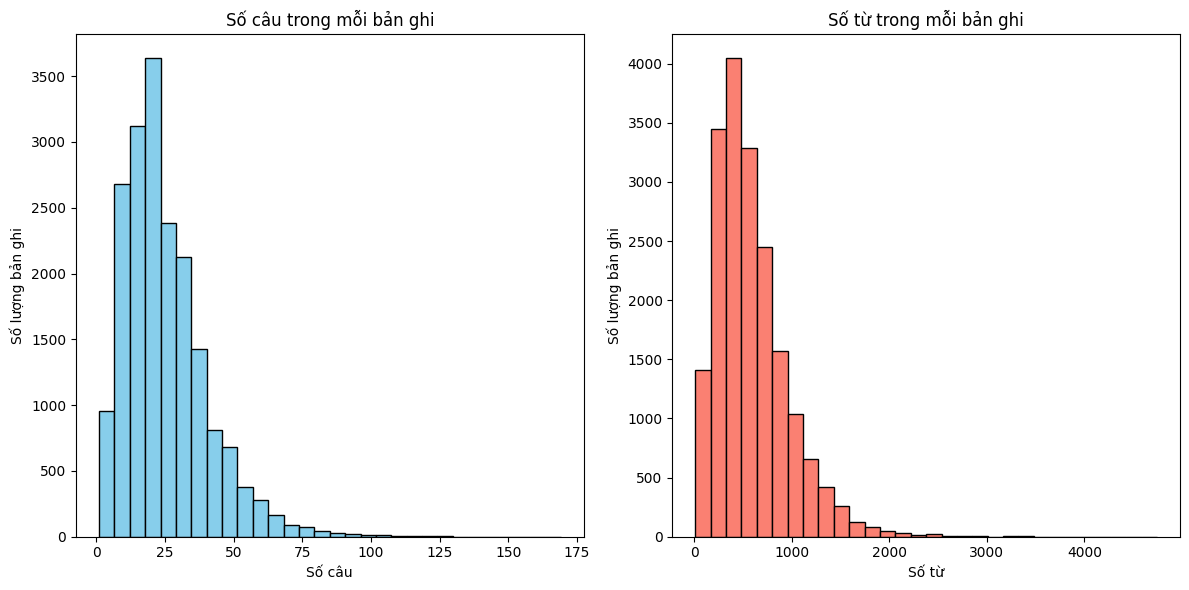

In [22]:
import matplotlib.pyplot as plt

# Tạo biểu đồ số câu và số từ cho mỗi bản ghi
plt.figure(figsize=(12, 6))

# Biểu đồ số câu trong mỗi bản ghi
plt.subplot(1, 2, 1)
plt.hist(sentence_counts_per_record, bins=30, color='skyblue', edgecolor='black')
plt.title('Số câu trong mỗi bản ghi')
plt.xlabel('Số câu')
plt.ylabel('Số lượng bản ghi')

# Biểu đồ số từ trong mỗi bản ghi
plt.subplot(1, 2, 2)
plt.hist(word_counts_per_record, bins=30, color='salmon', edgecolor='black')
plt.title('Số từ trong mỗi bản ghi')
plt.xlabel('Số từ')
plt.ylabel('Số lượng bản ghi')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()
